C:\Users\sjhkm\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\sjhkm\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


<AxesSubplot:>

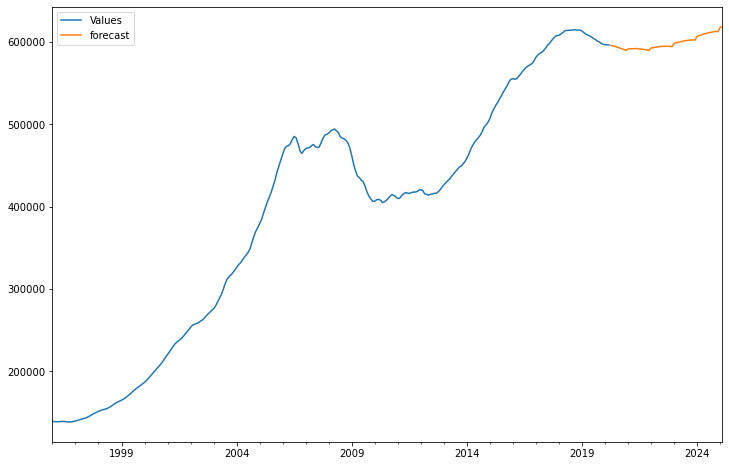

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

data = pd.read_csv('subset.csv', header = None)
data_refined = data.iloc[:,9:].T
df = data_refined.rename(columns = {0: "Date", 1: "Values"})
df["Values"] = pd.to_numeric(df["Values"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace = True)

model = sm.tsa.statespace.SARIMAX(df['Values'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
# model_fit.summary()

future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,60)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
future_df = pd.concat([df,future_datest_df])
future_df['forecast'] = model_fit.predict(start = 291, end = 351, dynamic = True)  
future_df[['Values', 'forecast']].plot(figsize=(12, 8))